# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Menna Hatem

ID: 55-4397

Tutorial: T-8

---

Name: Aya Hella

ID: 55-0755

Tutorial: T-8



## Dataset Description

The dataset contains information about customers and their churn status. Each row represents a customer, and each column contains customer attributes and information.

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|customerID| Unique identifier for each customer.
|gender| Gender of the customer (Male, Female).
|SeniorCitizen| Whether the customer is a senior citizen or not (1: Yes, 0: No).
|Partner| Whether the customer has a partner or not (Yes, No).
|Dependents| Whether the customer has dependents or not (Yes, No).
|tenure| Number of months the customer has stayed with the company.
|PhoneService| Whether the customer has a phone service or not (Yes, No).
|MultipleLines| Whether the customer has multiple lines or not (Yes, No, No phone service).
|InternetService| Type of internet service the customer has (DSL, Fiber optic, No).
|OnlineSecurity| Whether the customer has online security or not (Yes, No, No internet service).
|OnlineBackup| Whether the customer has online backup or not (Yes, No, No internet service).
|DeviceProtection| Whether the customer has device protection or not (Yes, No, No internet service).
|TechSupport| Whether the customer has tech support or not (Yes, No, No internet service).
|StreamingTV| Whether the customer has streaming TV or not (Yes, No, No internet service).
|StreamingMovies| Whether the customer has streaming movies or not (Yes, No, No internet service).
|Contract| The contract term of the customer (Month-to-month, One year, Two year).
|PaperlessBilling| Whether the customer has paperless billing or not (Yes, No).
|PaymentMethod| The payment method of the customer (Electronic check, Mailed check, Bank transfer, Credit card).
|MonthlyCharges| The amount charged to the customer monthly.
|TotalCharges| The total amount charged to the customer.
|Churn| Whether the customer churned or not (Yes, No).


## Importing Libraries & Dataset

In [ ]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d rashadrmammadov/customer-churn-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rashadrmammadov/customer-churn-dataset
License(s): CC0-1.0
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 13.5MB/s]


In [ ]:
!mkdir Customer_Churn_DM
!unzip customer-churn-dataset.zip -d Customer_Churn_DM

Archive:  customer-churn-dataset.zip
  inflating: Customer_Churn_DM/customer_churn_data.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Customer_Churn_DM/customer_churn_data.csv')

variables = ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod', 'InternetService', 'PhoneService',
             'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'PaperlessBilling', 'Partner', 'Dependents', 'Churn']

df = df[variables]

# Display the dataframe in Jupyter notebook
display(df)
#print(df.describe())

,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,InternetService,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Partner,Dependents,Churn
0,23,Month-to-month,49.85,1146.55,Bank transfer,No,No,No phone service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,No,Yes,No
1,43,Month-to-month,100.70,4330.10,Mailed check,DSL,No,No phone service,Yes,No,Yes,No,Yes,No,No,Yes,No,Yes
2,51,One year,97.33,4963.83,Electronic check,DSL,Yes,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes
3,72,Month-to-month,101.38,7299.36,Credit card,DSL,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No
4,25,Month-to-month,52.22,1305.50,Electronic check,DSL,Yes,Yes,No,No,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,71,Month-to-month,74.21,5268.91,Mailed check,DSL,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No
5876,22,One year,65.43,1439.46,Mailed check,DSL,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes
5877,68,One year,59.78,4065.04,Bank transfer,Fiber optic,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No
5878,14,Month-to-month,91.88,1286.32,Mailed check,Fiber optic,No,No phone service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


## Data Inspection

   tenure        Contract  MonthlyCharges  TotalCharges     PaymentMethod  \
0      23  Month-to-month           49.85       1146.55     Bank transfer   
1      43  Month-to-month          100.70       4330.10      Mailed check   
2      51        One year           97.33       4963.83  Electronic check   
3      72  Month-to-month          101.38       7299.36       Credit card   
4      25  Month-to-month           52.22       1305.50  Electronic check   

  InternetService PhoneService     MultipleLines       OnlineSecurity  \
0              No           No  No phone service  No internet service   
1             DSL           No  No phone service                  Yes   
2             DSL          Yes                No                   No   
3             DSL          Yes               Yes                  Yes   
4             DSL          Yes               Yes                   No   

          OnlineBackup     DeviceProtection          TechSupport  \
0  No internet service  No int

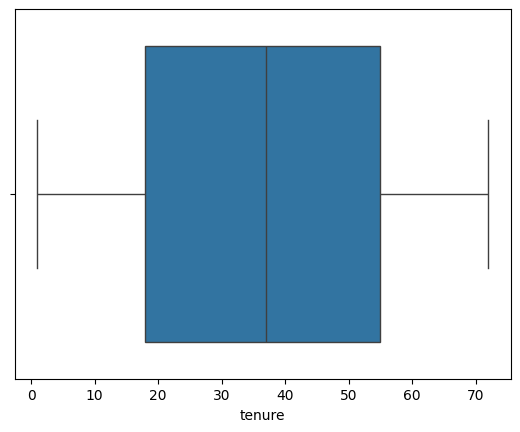

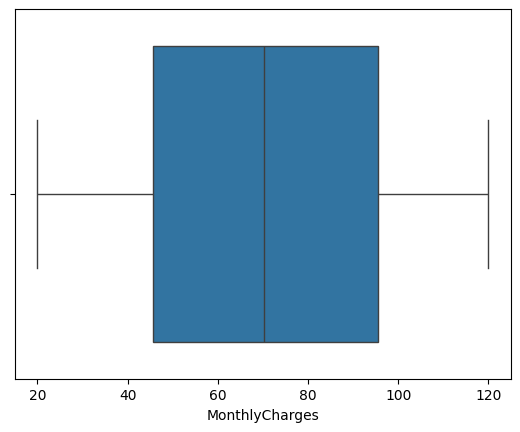

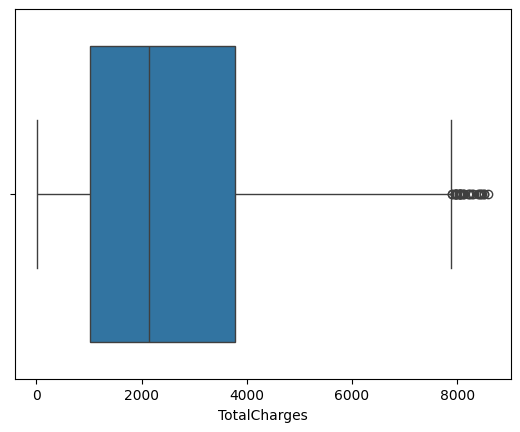

In [ ]:
# explore data
print(df.head())
print(df.info())

# check for nulls in attributes
print(df.isnull().sum())

# check for duplicates
print(df.duplicated().sum())

# check data types
print(df.dtypes)

# handle float number
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")


# check for outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['tenure'])
plt.show()

sns.boxplot(x=df['MonthlyCharges'])
plt.show()

sns.boxplot(x=df['TotalCharges'])
plt.show()

## Data Cleaning

In [ ]:
# Step 1: Replace 'No internet service' and 'No phone service' with 'No' in relevant columns
no_service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[no_service_columns] = df[no_service_columns].replace({'No internet service': 'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['PhoneService'] = df['PhoneService'].replace({'No phone service': 'No'})

print("After Replacing 'No internet service' and 'No phone service' values:\n", df[no_service_columns + ['PhoneService']].head(), "\n")
df

After Replacing 'No internet service' and 'No phone service' values:
   MultipleLines OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0            No             No           No               No          No   
1            No            Yes           No              Yes          No   
2            No             No          Yes              Yes         Yes   
3           Yes            Yes           No              Yes          No   
4           Yes             No           No               No         Yes   

  StreamingTV StreamingMovies PhoneService  
0          No              No           No  
1         Yes              No           No  
2          No              No          Yes  
3          No              No          Yes  
4          No             Yes          Yes   



,tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,InternetService,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Partner,Dependents,Churn
0,23,Month-to-month,49.85,1146.55,Bank transfer,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No
1,43,Month-to-month,100.70,4330.10,Mailed check,DSL,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Yes
2,51,One year,97.33,4963.83,Electronic check,DSL,Yes,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes
3,72,Month-to-month,101.38,7299.36,Credit card,DSL,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No
4,25,Month-to-month,52.22,1305.50,Electronic check,DSL,Yes,Yes,No,No,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,71,Month-to-month,74.21,5268.91,Mailed check,DSL,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No
5876,22,One year,65.43,1439.46,Mailed check,DSL,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,Yes
5877,68,One year,59.78,4065.04,Bank transfer,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No
5878,14,Month-to-month,91.88,1286.32,Mailed check,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


In [ ]:
# Step 2: Convert 'Churn' column to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print("After Converting 'Churn' to Binary:\n", df['Churn'].head(), "\n")

After Converting 'Churn' to Binary:
 0    0
1    1
2    1
3    0
4    1
Name: Churn, dtype: int64 



In [ ]:
# Step 3: Remove duplicate rows (although no duplicates found in previous checks)
duplicate_count = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Removed {duplicate_count} duplicate rows. New shape: {df.shape}\n")

Removed 0 duplicate rows. New shape: (5880, 18)



Boxplot for numerical columns to check for outliers:


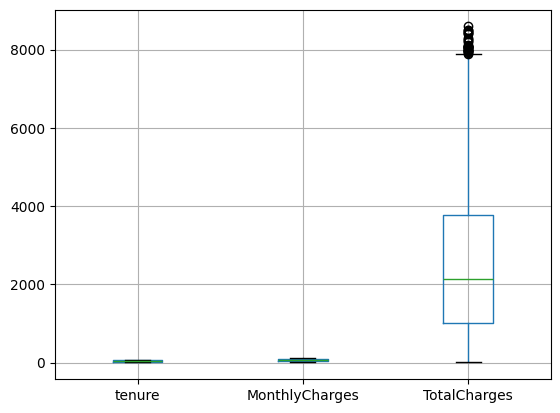

In [ ]:
# Step 4: Check for outliers in numerical columns using a boxplot
print("Boxplot for numerical columns to check for outliers:")
df[['tenure', 'MonthlyCharges', 'TotalCharges']].boxplot()
plt.show()


In [ ]:
# Step 5: Cap 'TotalCharges' at the 95th percentile
upper_limit = df['TotalCharges'].quantile(0.95)
df['TotalCharges'] = np.where(df['TotalCharges'] > upper_limit, upper_limit, df['TotalCharges'])
print("Capped 'TotalCharges' at the 95th percentile.\n")

Capped 'TotalCharges' at the 95th percentile.



In [ ]:
 # Step 7: Encode 'Contract' as an ordinal categorical variable and then convert it to numerical encoding
 from sklearn.preprocessing import LabelEncoder
 df['Contract'] = pd.Categorical(df['Contract'], categories=['Month-to-month', 'One year', 'Two year'], ordered=True)
 df['Contract_encoded'] = LabelEncoder().fit_transform(df['Contract'])
 df = df.drop('Contract', axis=1)
 df = df.rename(columns={'Contract_encoded': 'Contract'})

 print("After Encoding 'Contract':\n", df[['Contract']].head(), "\n")

After Encoding 'Contract':
    Contract
0         0
1         0
2         1
3         0
4         0 



In [ ]:
 # Step 8: Encode remaining categorical columns as binary (0 and 1)
 df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
 df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
 df['Partner'] = df['Partner'].astype('category').cat.codes
 df['Dependents'] = df['Dependents'].astype('category').cat.codes

 print("After Encoding Other Binary Categorical Columns:\n", df[['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents']].head(), "\n")

After Encoding Other Binary Categorical Columns:
    PhoneService  PaperlessBilling  Partner  Dependents
0             0                 1        0           1
1             0                 0        1           0
2             1                 0        0           0
3             1                 0        0           0
4             1                 0        0           0 



In [ ]:
scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])
print("After Scaling 'MonthlyCharges', and 'TotalCharges':\n", df[['tenure', 'MonthlyCharges', 'TotalCharges']].head(), "\n")

After Scaling 'MonthlyCharges', and 'TotalCharges':
    tenure  MonthlyCharges  TotalCharges
0      23           -0.71         -0.76
1      43            1.06          0.99
2      51            0.94          1.33
3      72            1.08          2.13
4      25           -0.62         -0.67 



In [ ]:
# Step 10: Final Data Structure and Type Check
print("Final DataFrame Info:\n")
print(df.info())
print("\nFinal Data Sample:\n", df.head())

Final DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            5880 non-null   int64  
 1   MonthlyCharges    5880 non-null   float64
 2   TotalCharges      5880 non-null   float64
 3   PaymentMethod     5880 non-null   object 
 4   InternetService   5880 non-null   object 
 5   PhoneService      5880 non-null   int8   
 6   MultipleLines     5880 non-null   object 
 7   OnlineSecurity    5880 non-null   object 
 8   OnlineBackup      5880 non-null   object 
 9   DeviceProtection  5880 non-null   object 
 10  TechSupport       5880 non-null   object 
 11  StreamingTV       5880 non-null   object 
 12  StreamingMovies   5880 non-null   object 
 13  PaperlessBilling  5880 non-null   int8   
 14  Partner           5880 non-null   int8   
 15  Dependents        5880 non-null   int8   
 16  Churn             5

In [ ]:
# Step 11: Save the cleaned dataset
df.to_csv('cleaned_customer_churn_data.csv', index=False)
print("Cleaned dataset saved to 'cleaned_customer_churn_data.csv'.")

Cleaned dataset saved to 'cleaned_customer_churn_data.csv'.


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

<ipython-input-15-95801194239c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotate x labels for better readability
<ipython-input-15-95801194239c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotate x labels for better readability
<ipython-input-15-95801194239c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotate x labels for better readability
<ipython-input-15-95801194239c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)  #

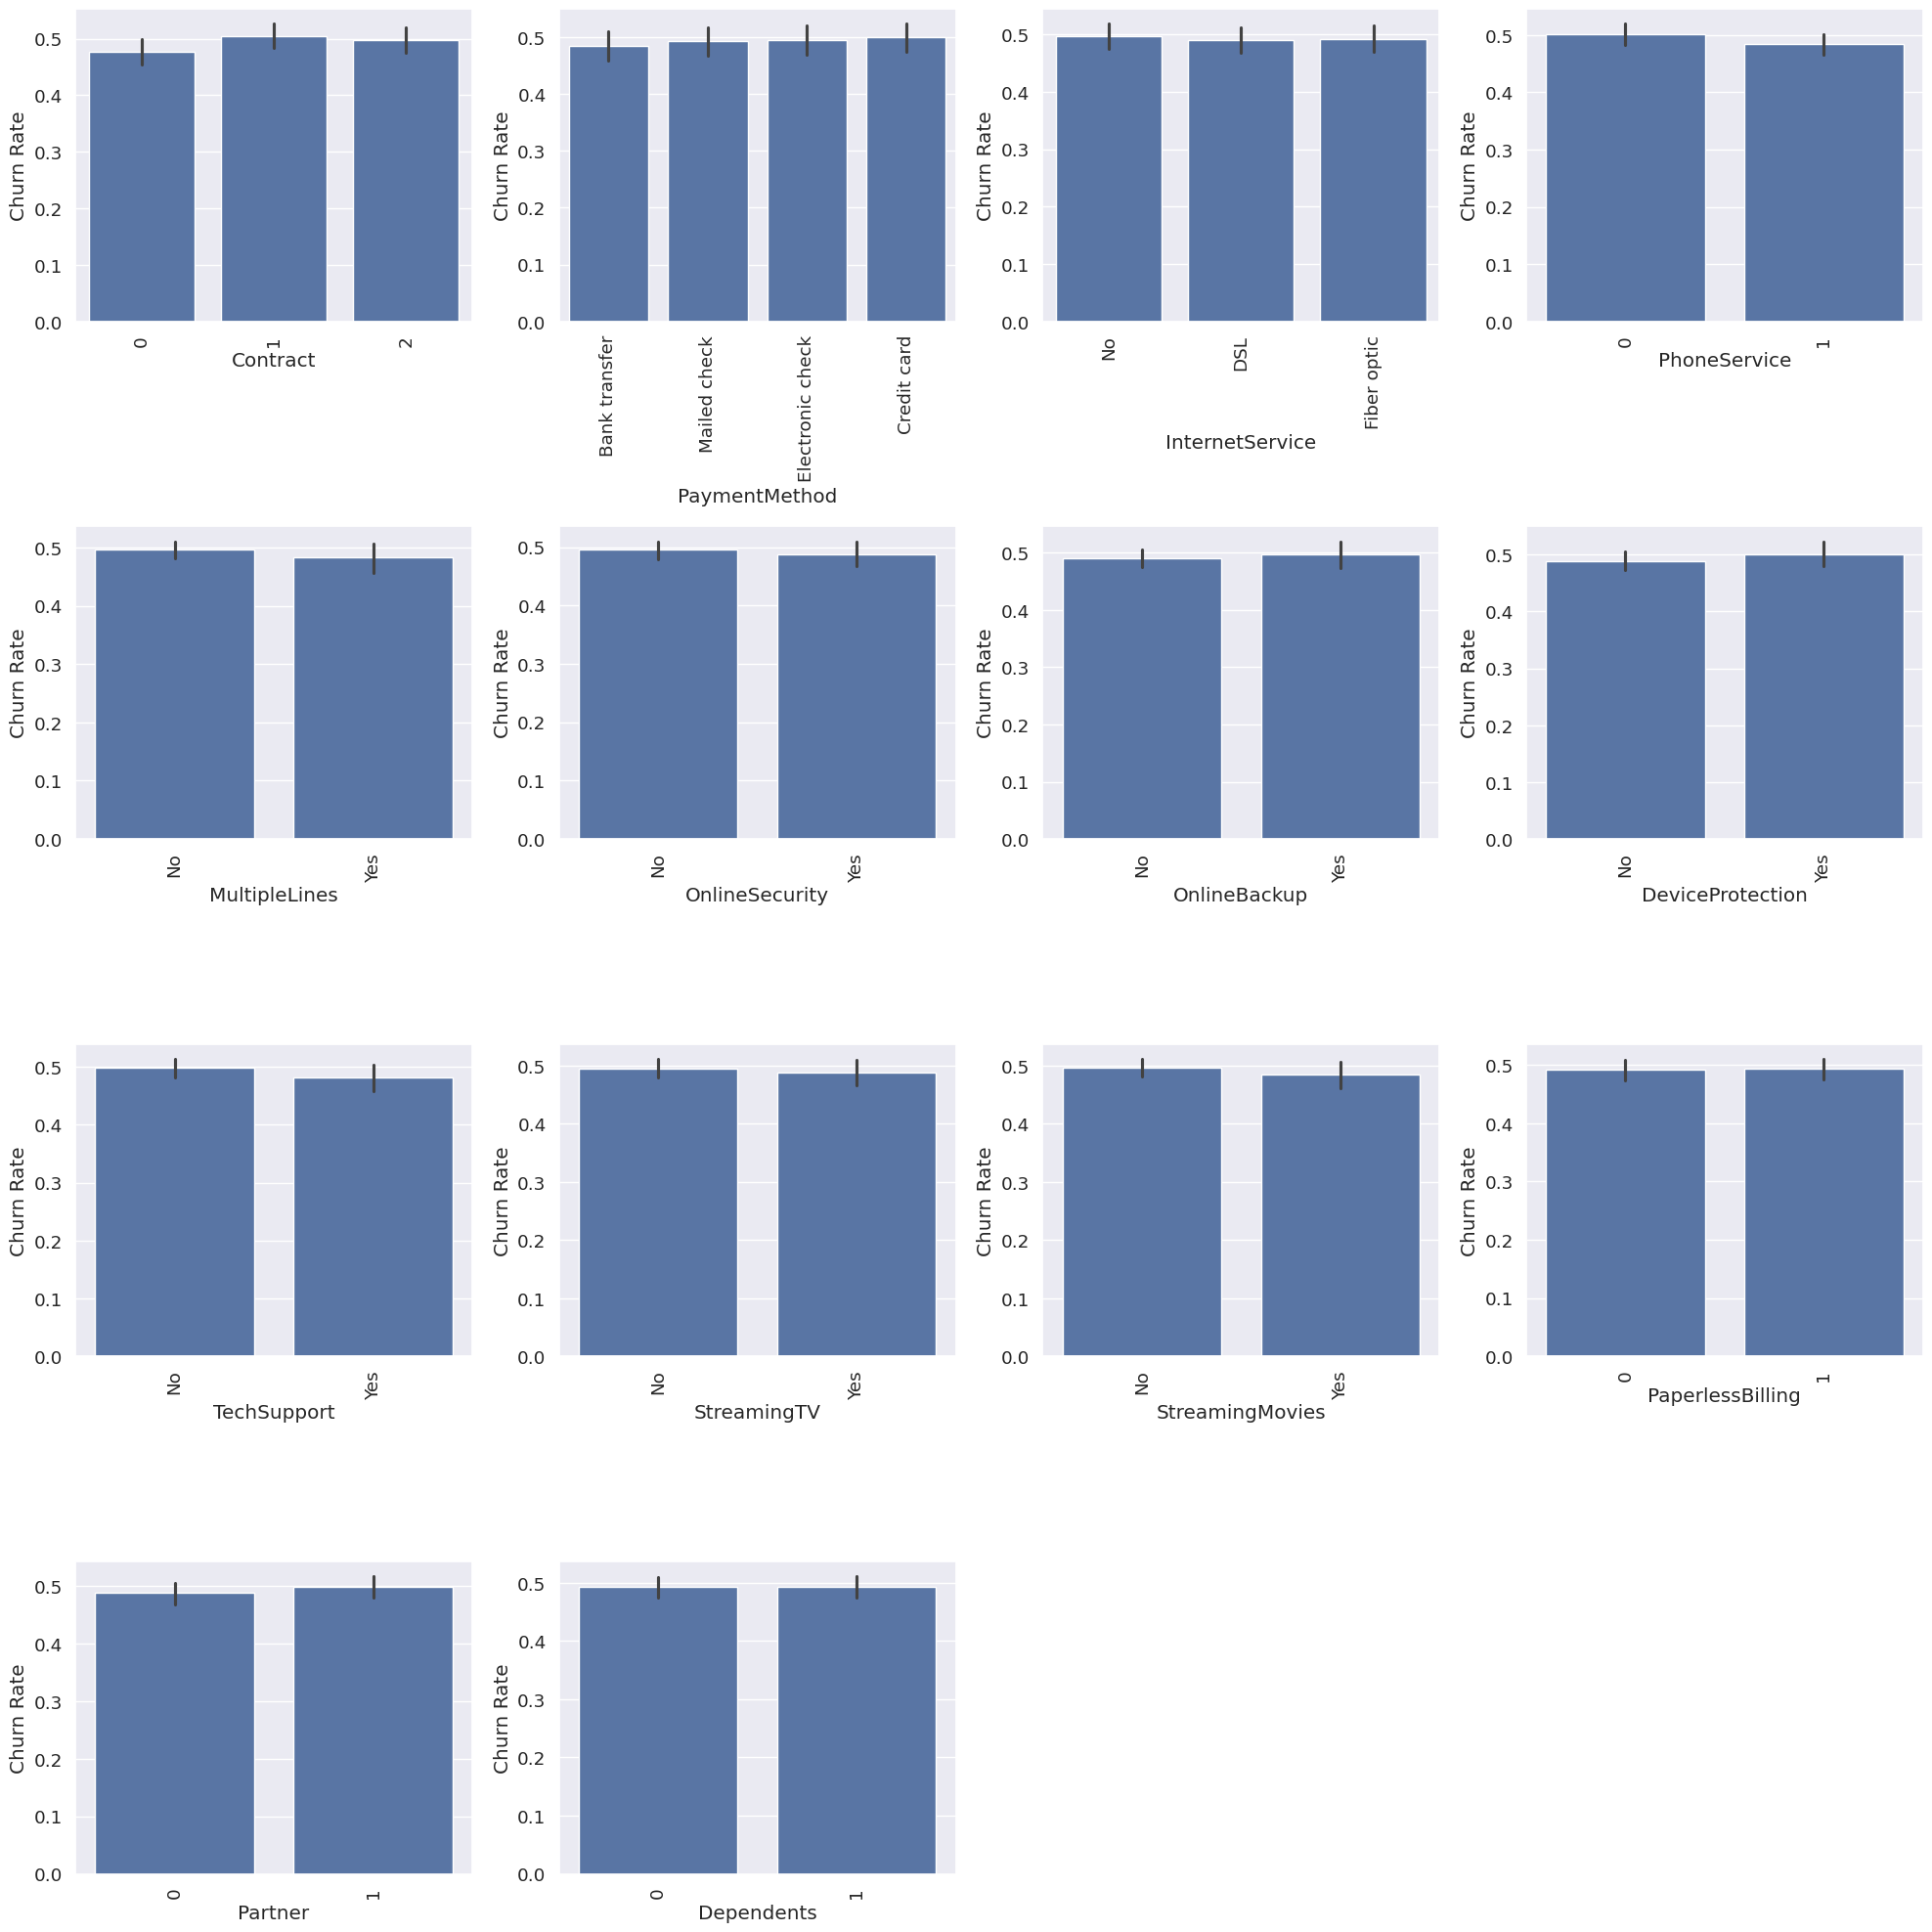

Churn               1.00
Contract            0.02
TotalCharges        0.02
MonthlyCharges      0.01
DeviceProtection    0.01
Partner             0.01
tenure              0.01
OnlineBackup        0.01
InternetService     0.01
PaymentMethod       0.00
Dependents          0.00
PaperlessBilling    0.00
OnlineSecurity     -0.01
StreamingTV        -0.01
MultipleLines      -0.01
StreamingMovies    -0.01
TechSupport        -0.02
PhoneService       -0.02
Name: Churn, dtype: float64


In [ ]:

# Extract categorical columns (assuming columns are named like 'Contract', 'PaymentMethod', etc.)
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')

# Plotting every categorical feature average in relation to the 'Exited' column
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size as needed
    g = sns.barplot(x=column, y='Churn', data=df)  # y='Exited' is the target variable for churn
    g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotate x labels for better readability
    plt.ylabel('Churn Rate')  # Label for y-axis
    plt.xlabel(f'{column}')  # Label for x-axis

plt.tight_layout()
plt.show()

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns to apply label encoding (for simplicity)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation of all features with the 'Churn' column (customer churn)
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_correlation)



**Answer for Q1**: Contract: customers whose contract is one year are more likely to churn
,payment method: customers who pay using credit card or electronic check are more likey to churn
,phone service: customer who doesn't have a phone service are more likely to churn
, internet service: customers who have no internet service are more likely to churn


**the results show that total charges has a weak positive correlation with churn, as it increases , customers are more likely to churn. Also, it shows a weak negative correlation with churn indicating that if a customer doesn't have phone service, they're more likely to churn. conclusion the most correlated attributes with churn are total charges, contract, tech support, and phone service**


**Q2: Which payment method has the highest churn rate?**

**Visualization**

PaymentMethod
Credit Card        0.50
Electronic Check   0.49
Mailed check       0.49
Bank Transfer      0.48
Name: Churn, dtype: float64


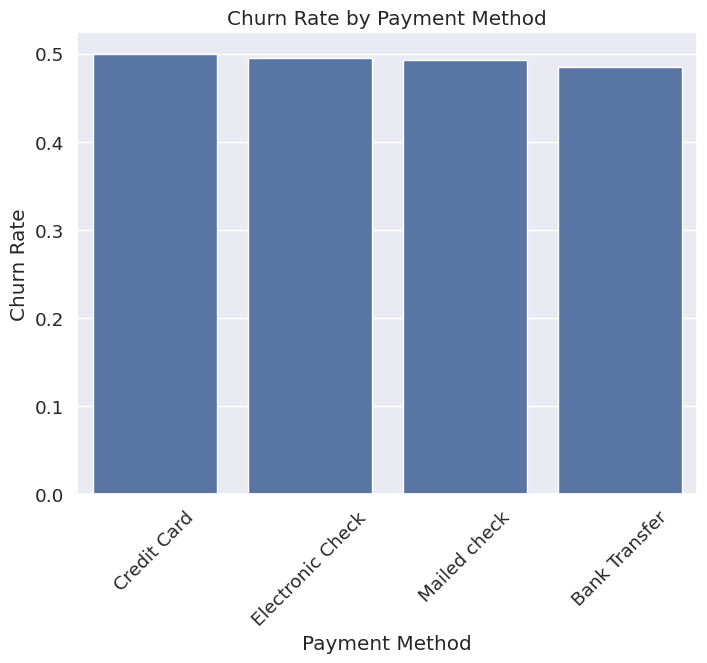

In [ ]:
# Create a mapping dictionary for payment methods
payment_method_mapping = {
    0: 'Bank Transfer',
    1: 'Credit Card',
    2: 'Electronic Check',
    3: 'Mailed check'
}

# Map the numeric values in 'PaymentMethod' to their respective names
df['PaymentMethod'] = df['PaymentMethod'].map(payment_method_mapping)

# Group by the 'PaymentMethod' column and calculate the churn rate
payment_churn_rate = df.groupby('PaymentMethod')['Churn'].mean()

# Sort the churn rates in descending order to find the payment method with the highest churn
payment_churn_rate = payment_churn_rate.sort_values(ascending=False)

# Display the payment method with the highest churn rate
print(payment_churn_rate)

# Visualize the churn rates for each payment method
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_churn_rate.index, y=payment_churn_rate.values)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()


**Answer for Q2**: customers who pay using credit card has the highest churn rate

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

25th percentile: 18.0 months
50th percentile (median): 37.0 months
75th percentile: 55.0 months


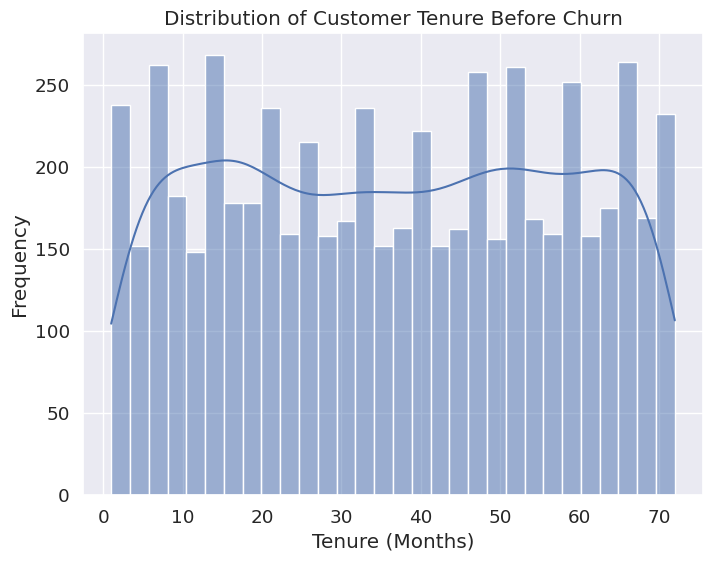

In [ ]:
# Calculate the quantiles of the 'Tenure' column
Q1 = df['tenure'].quantile(0.25)
Q2 = df['tenure'].quantile(0.50)  # 50th percentile (median)
Q3 = df['tenure'].quantile(0.75)

# Display the quantiles
print(f"25th percentile: {Q1} months")
print(f"50th percentile (median): {Q2} months")
print(f"75th percentile: {Q3} months")

# Plotting the distribution of 'Tenure' (the number of months before churning)
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title('Distribution of Customer Tenure Before Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()


**Answer for Q3**: customers commonly churn after 8 or 14 months , within 20 months, or they commonly churn between 48 to 67 months

## Data Preparation for Modelling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Define Features (X) and Target (y)
X = df.drop(columns=['Churn'])  # Dropping the target variable 'Churn' from features
y = df['Churn']  # Define Churn as the target variable

# Step 2: One-Hot Encode Categorical Variables
X = pd.get_dummies(X, drop_first=True)  # Encoding categorical variables

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to confirm data split
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (4704, 19)
Testing Features Shape: (1176, 19)
Training Target Shape: (4704,)
Testing Target Shape: (1176,)


## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize Decision Tree and define parameter grid for tuning
tree_clf = DecisionTreeClassifier(random_state=42)

param_grid_tree = {
    "criterion": ["gini", "entropy"],
    "max_depth": [10, 15],  # Adjust depth options
    "min_samples_split": [2, 5],  # Minimum samples required to split
    "min_samples_leaf": [1, 2]  # Minimum samples required at a leaf node
}

# Perform Randomized Search for Decision Tree with F1-score as the metric
tree_cv = RandomizedSearchCV(tree_clf, param_distributions=param_grid_tree, scoring="f1", n_jobs=-1, verbose=1, cv=3, n_iter=10, random_state=42)
tree_cv.fit(X_train, y_train)

# Retrieve the best parameters from Randomized Search
best_params_tree = tree_cv.best_params_
print(f"Best parameters for Decision Tree: {best_params_tree}")

# Train the Decision Tree with the best parameters and class weights for balanced classes
tree_clf = DecisionTreeClassifier(**best_params_tree, class_weight="balanced", random_state=42)
tree_clf.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

### Tree Visualization

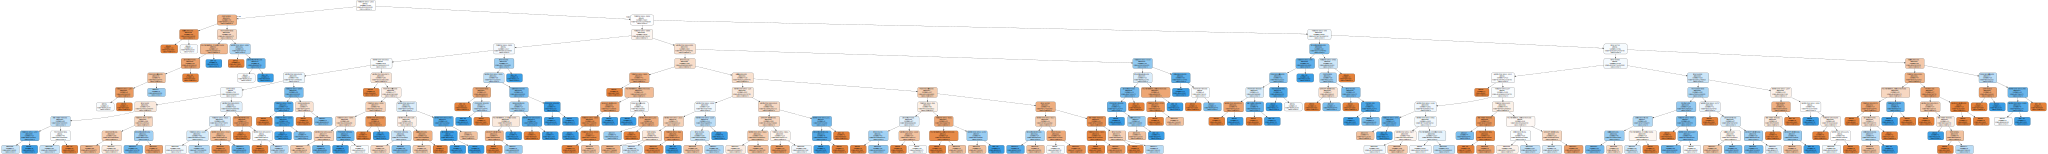

In [ ]:
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['not churn', 'churn'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

graph


The decision tree splits the data into subsets by evaluating features that provide the highest information gain or reduce the Gini impurity at each node, using the optimal parameters found through grid search. The resulting tree structure visualized through Graphviz displays each split as a decision point where a specific feature and threshold (like tenure, monthly charges, or internet service type) are evaluated to separate customers with different churn probabilities

rule 1: If a customer has a month-to-month contract and their monthly charges are greater than $70, they are likely to churn.


## Evaluation

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# Predictions on training and testing sets
y_train_pred_tree = tree_clf.predict(X_train)
y_test_pred_tree = tree_clf.predict(X_test)

# Evaluation metrics
print("Optimized Decision Tree - Training F1 Score: ", f1_score(y_train, y_train_pred_tree))
print("Optimized Decision Tree - Testing F1 Score: ", f1_score(y_test, y_test_pred_tree))
print("Optimized Decision Tree - Training Accuracy: ", accuracy_score(y_train, y_train_pred_tree))
print("Optimized Decision Tree - Testing Accuracy: ", accuracy_score(y_test, y_test_pred_tree))

# Detailed Classification Report and Confusion Matrix for Test Set
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_test_pred_tree))
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_test_pred_tree))


Optimized Decision Tree - Training F1 Score:  0.6767458603311735
Optimized Decision Tree - Testing F1 Score:  0.5635202271114266
Optimized Decision Tree - Training Accuracy:  0.6181972789115646
Optimized Decision Tree - Testing Accuracy:  0.4770408163265306

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.47      0.28      0.35       596
           1       0.48      0.68      0.56       580

    accuracy                           0.48      1176
   macro avg       0.48      0.48      0.46      1176
weighted avg       0.48      0.48      0.45      1176


Confusion Matrix (Decision Tree):
 [[164 432]
 [183 397]]


## Bonus (Optional)